In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import fftpack

In [3]:
Sens = pd.read_csv("Datos_2.0uAplus_0.125Hz.csv", names=['value1','value2','value3'], header=0, delimiter='\t')
#Sens = pd.read_csv("Datos_0.1Hz_5nT.csv", names=['value1','value2','value3'], header=0, delimiter=',')


16.183848
16.1577
0.026148


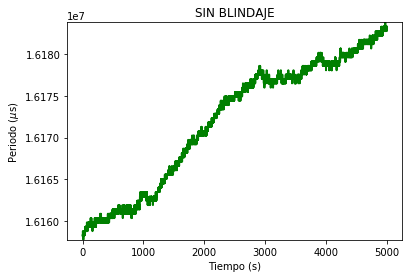

In [4]:
fig= plt.plot(2)
N=np.size(Sens.value1)

Ni=75000
Nf=80000
SensSB= Sens.iloc[Ni:Nf]

Y_min=np.min(SensSB.value1)
Y_max=np.max(SensSB.value1)

Nx1=np.size(SensSB.value1)
X=np.linspace(0,Nx1,Nx1)

curm= plt.plot(X, SensSB.value1, "-", c='green', lw=2)
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
#e=plt.errorbar(temp, Ymean, yerr=e, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=3, lw=0.3)?
print(Y_max/1e6)
print(Y_min/1e6)
print((Y_max-Y_min)/1e6)
plt.xlabel('Tiempo (s)')
plt.ylabel(r'Periodo ($\mu$s)')
#plt.xlim(Ni,Nf)
plt.ylim(Y_min,Y_max)
plt.title('SIN BLINDAJE')

#plt.show(1)

plt.savefig("resultados_ajuste_ruido.pdf", dpi=500)

15.749024
15.727722
0.021302


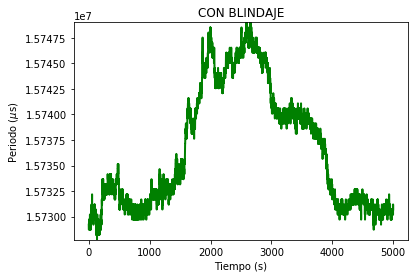

In [5]:
fig= plt.plot(3)
N=np.size(Sens.value2)
Ni=75000
Nf=80000
SensCB= Sens.iloc[Ni:Nf]

Y_min=np.min(SensCB.value2)
Y_max=np.max(SensCB.value2)

Nx2=np.size(SensCB.value2)
X=np.linspace(0,Nx2,Nx2)

curm= plt.plot(X, SensCB.value2, "-", c='green', lw=2)
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
#e=plt.errorbar(temp, Ymean, yerr=e, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=3, lw=0.3)
print(Y_max/1e6)
print(Y_min/1e6)
print((Y_max-Y_min)/1e6)

plt.xlabel('Tiempo (s)')
plt.ylabel(r'Periodo ($\mu$s)')
#plt.xlim(Ni,Nf)

plt.ylim(Y_min,Y_max)
plt.title('CON BLINDAJE')

#plt.show(1)
plt.savefig("resultados_ajuste_ruido.pdf", dpi=1000)

Text(0.5, 1.0, 'FUERA DE BOBINA, SIN BLINDAJE')

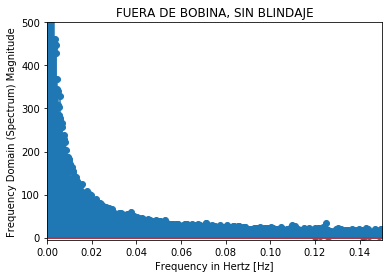

In [8]:
f_s = 1
X1 = fftpack.fft(SensSB.value1)
freqs2 = fftpack.fftfreq(len(SensSB.value1))*f_s

fig, ax = plt.subplots()

ax.stem(freqs2, 2*np.abs(X1)/Nx1)
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 0.15)
ax.set_ylim(-5, 0.5e3)
plt.title('FUERA DE BOBINA, SIN BLINDAJE')

Text(0.5, 1.0, 'DENTRO DEBOBINA, CON BLINDAJE')

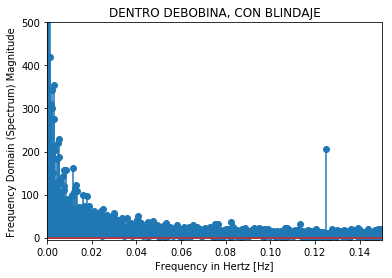

In [9]:
X2 = fftpack.fft(SensCB.value2)
freqs1 = fftpack.fftfreq(len(SensCB.value2))*f_s

fig, ax = plt.subplots()

ax.stem(freqs1, 2*np.abs(X2)/Nx2)
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 0.15)
ax.set_ylim(-5, 0.5e3)
plt.title('DENTRO DEBOBINA, CON BLINDAJE')